# Backtesting Stocks Strategy

In [255]:
#import statements
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from utils.OHLC_Helper import getAlphaOHLC

sns.set_theme(color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import yfinance as yf
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
import talib
sns.set_theme(color_codes=True)
API_KEY = 'EC1W3AWVDZ3LA1T8'
ts= TimeSeries(key=API_KEY,output_format='pandas' )
ti = TechIndicators(key=API_KEY,output_format='pandas')
sns.set(rc={'figure.figsize':(30,9)})


In [256]:
interval = '15min'
start = '2020-01-01'
end = '2022-3-31'
# google,meta_data = ts.get_intraday(symbol="GOOG",interval=interval, outputsize='full',)
appleData,meta_data =ts.get_intraday(symbol='GOOG',interval=interval, outputsize='full',)
# appleData,meta_data =ts.get_daily(symbol='AAPL',outputsize='full')
apple = getAlphaOHLC(appleData,)
apple



,open,high,low,close,volume
date,,,,,
2022-03-22 08:00:00,2730.00,2730.00,2730.00,2730.00,368.0
2022-03-22 08:15:00,2730.00,2730.00,2730.00,2730.00,416.0
2022-03-22 08:30:00,2729.00,2730.50,2729.00,2730.50,473.0
2022-03-22 09:30:00,2730.95,2733.00,2730.95,2733.00,329.0
2022-03-22 09:45:00,2730.00,2773.29,2730.00,2765.77,105186.0
...,...,...,...,...,...
2022-05-03 16:00:00,2358.03,2367.07,2353.75,2363.38,100614.0
2022-05-03 16:15:00,2362.59,2362.59,2362.59,2362.59,42636.0
2022-05-03 16:30:00,2362.59,2362.59,2362.59,2362.59,731.0


In [257]:
period = 40
apple['EMA_15']= apple['close'].ewm(span=period,min_periods=period).mean()
apple['rolling_std'] = apple['close'].rolling(window=period).std().shift(1)
apple['upper_band'] = apple['EMA_15'] + 1.6*apple['rolling_std']
apple['lower_band'] = apple['EMA_15'] - 1.6*apple['rolling_std']
df= apple[-700:]
px.line(df,y=['close','upper_band','lower_band'],title='Apple Stock Price')


/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/2417529484.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/2417529484.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/2417529484.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

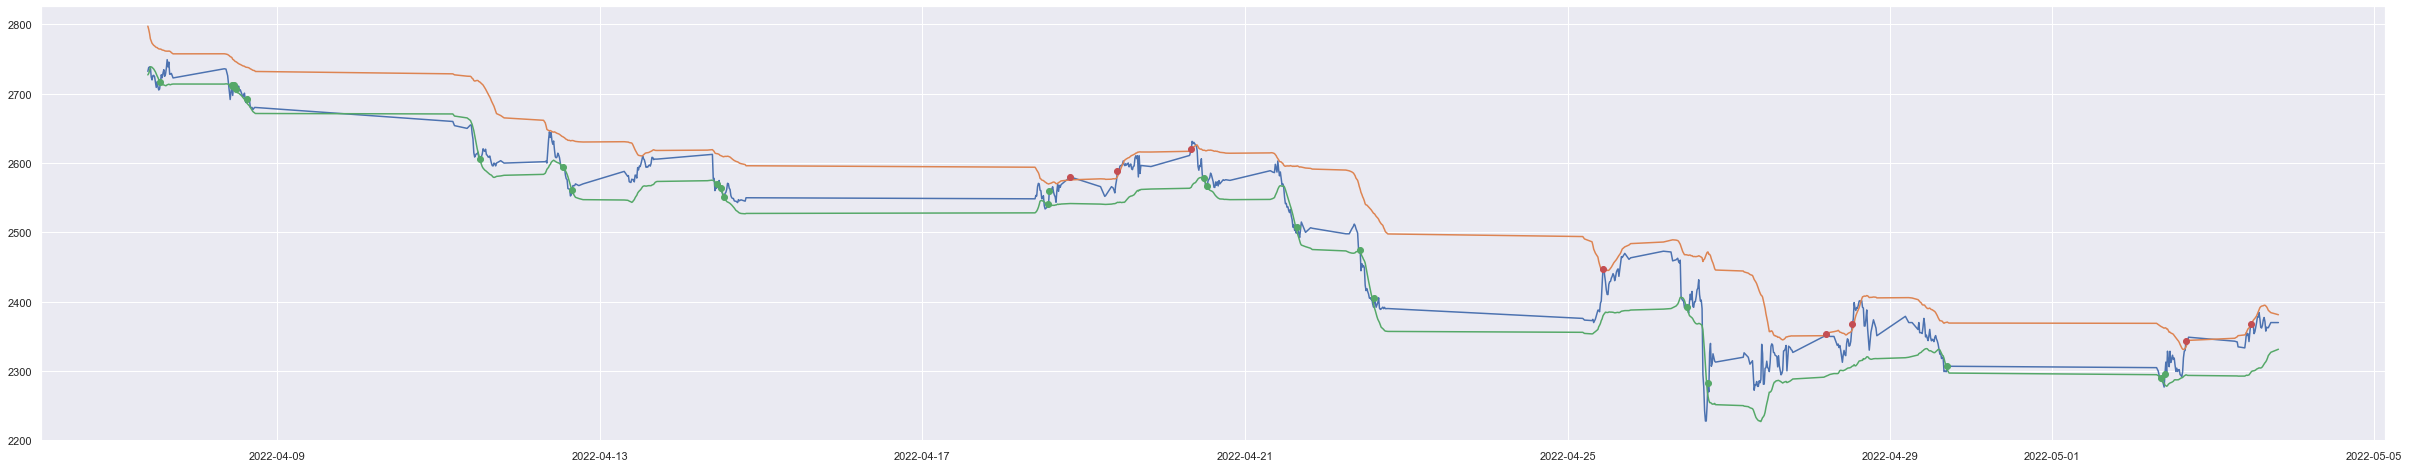

In [258]:
apple = apple[-700:]
apple['signal_upper'] = np.where(apple['close']>apple['upper_band'],1,0)
apple['entry_upper'] = apple.signal_upper.diff()
close_buy_signal = apple[apple['entry_upper']==1]
open_short_signal = apple[apple['entry_upper']==-1]
apple['signal_lower'] = np.where(apple['close']<apple['lower_band'],-2,0)
apple['entry_lower'] = apple.signal_lower.diff()
open_buy_signal = apple[apple['entry_lower']==2]
close_short_signal = apple[apple['entry_lower']==-2]
plt.figure(figsize=(42,8))
plt.plot(df['close'])
plt.plot(df['upper_band'])
plt.plot(df['lower_band'])
plt.plot(close_buy_signal.index,close_buy_signal['close'],'ro')
plt.plot(open_buy_signal.index,open_buy_signal['close'],'go')


/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/1659321600.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/1659321600.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c9/8r4kyvcj2n549rc9ckxkqqzh0000gn/T/ipykernel_1595/1659321600.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

thnh


DatetimeIndex(['2022-04-18 20:00:00', '2022-04-25 10:30:00',
               '2022-04-28 05:00:00', '2022-05-02 16:00:00'],
              dtype='datetime64[ns]', name='date', freq=None)

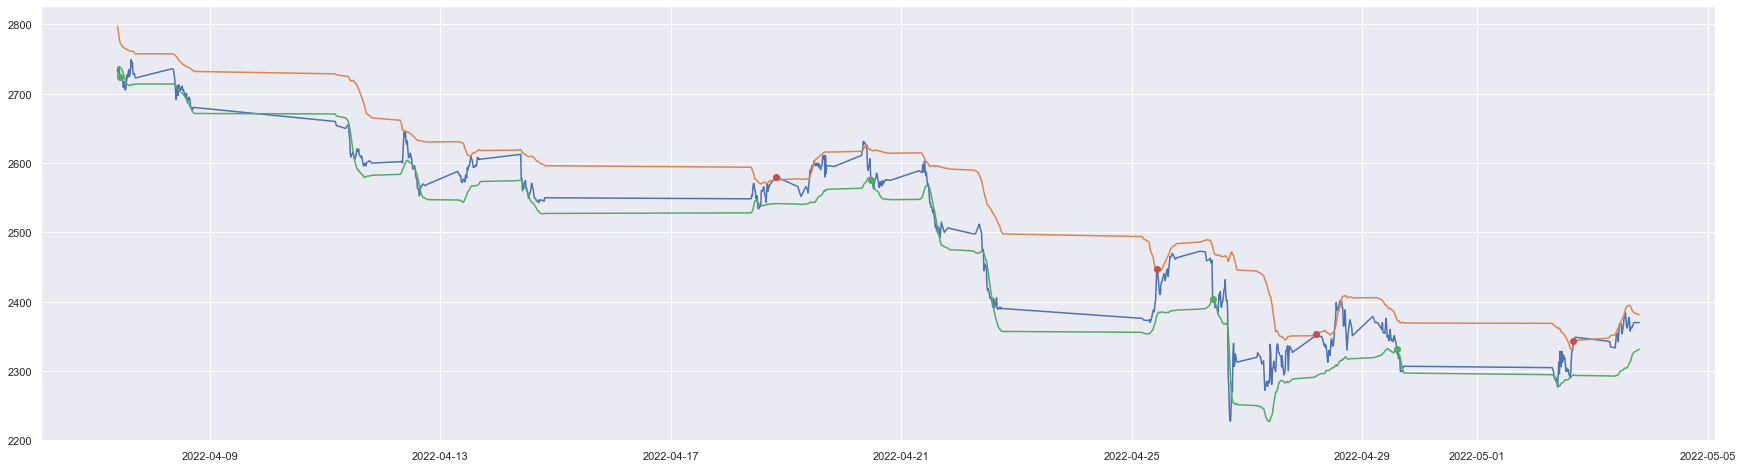

In [259]:

# iterate through apple data and create signals
last_buy_date=None
buy_dates = []
sell_dates = []
apple['isBuy'] = 0
apple['isSell'] = 0
for date,row in apple.iterrows():
    close = row['close']
    upper = row['upper_band']
    lower = row['lower_band']
    if(close>upper and last_buy_date is not None):
        # sell
        # print(f"sell on {date}")
        sell_dates.append(date)
        apple['isSell'][date]= 1
        last_buy_date = None
    elif(close<lower and last_buy_date is None):
        # buy
        # print(f"buy on {date}")
        buy_dates.append(date)
        apple['isBuy'][date]= 1
        last_buy_date = date
    else:
        pass
    # print(f' date {date}  close {row["close"]}')
buys = apple[apple['isBuy']==1]
sells = apple[apple['isSell']==1]

# print(buy_dates)
# print(sell_dates)

fig, ax = plt.subplots(figsize=(30,8))
# plt.figure(figsize=(42,8))
plt.plot(apple['close'])
plt.plot(apple['upper_band'])
plt.plot(apple['lower_band'])
plt.plot(sells.index,sells['close'],'ro')
plt.plot(buys.index,buys['close'],'go')
print('thnh')


sells.index




In [260]:
transactions = pd.concat([buys,sells],axis=0)
print(f'buys lengith {len(buys)}')
print(f'sells length {len(sells)}')
transactions.sort_index(inplace=True)
transactions

buys lengith 4
sells length 4


,open,high,low,close,volume,EMA_15,rolling_std,upper_band,lower_band,signal_upper,entry_upper,signal_lower,entry_lower,isBuy,isSell
date,,,,,,,,,,,,,,,
2022-04-07 10:30:00,2735.43,2735.430,2723.680,2724.0500,28023.0,2757.256750,11.598635,2775.814566,2738.698934,0,0.0,-2,-2.0,1,0
2022-04-18 20:00:00,2580.00,2580.000,2580.000,2580.0000,132.0,2558.713403,10.667947,2575.782118,2541.644688,1,1.0,0,0.0,0,1
2022-04-20 11:30:00,2584.61,2584.610,2569.850,2575.0000,36589.0,2597.897217,12.807474,2618.389176,2577.405258,0,0.0,-2,-2.0,1,0
2022-04-25 10:30:00,2424.18,2450.405,2413.920,2447.1525,78782.0,2411.381066,19.877554,2443.185152,2379.576980,1,1.0,0,0.0,0,1
2022-04-26 10:00:00,2405.06,2419.130,2396.701,2403.7200,97057.0,2440.897022,21.814550,2475.800303,2405.993742,0,0.0,-2,-2.0,1,0
2022-04-28 05:00:00,2354.00,2354.000,2354.000,2354.0000,169.0,2322.753404,18.631836,2352.564342,2292.942466,1,1.0,0,0.0,0,1
2022-04-29 14:30:00,2339.86,2344.280,2329.180,2331.1800,31553.0,2353.071866,13.610680,2374.848954,2331.294779,0,0.0,-2,-2.0,1,0
2022-05-02 16:00:00,2331.04,2346.790,2330.990,2344.0900,150145.0,2314.830563,12.591073,2334.976280,2294.684847,1,1.0,0,0.0,0,1


profits [-144.05000000000018, -127.84749999999985, -49.7199999999998, 12.91000000000031]


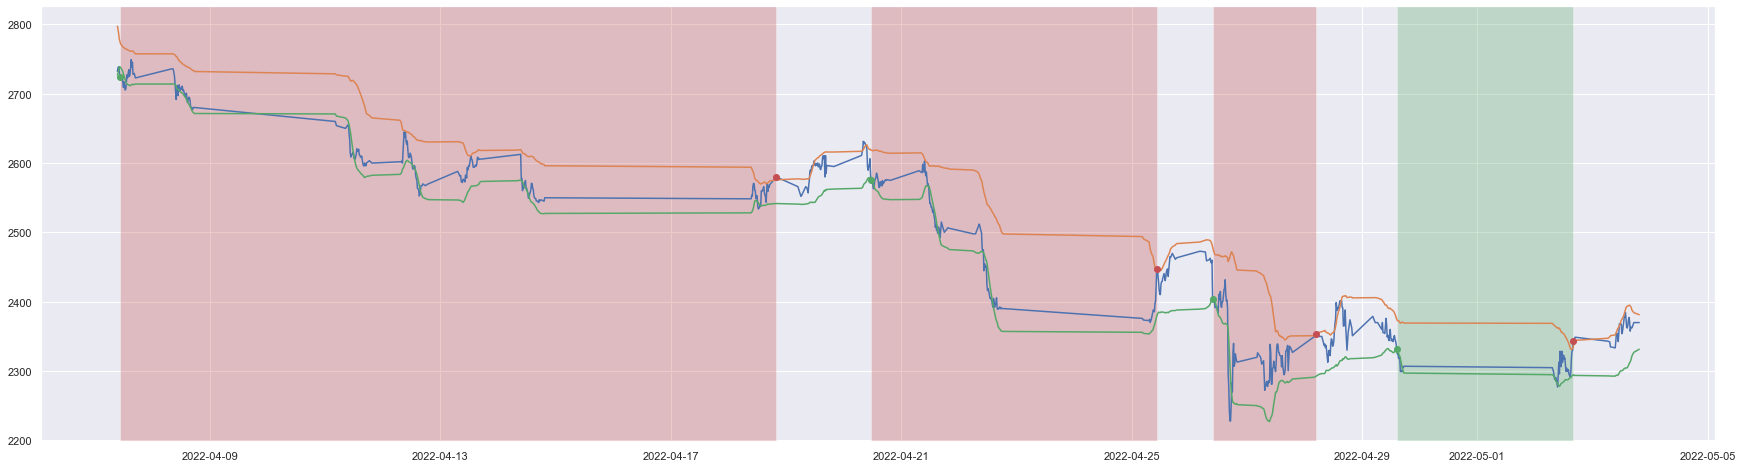

In [261]:
fig, ax = plt.subplots(figsize=(30,8))
# plt.figure(figsize=(42,8))
plt.plot(apple['close'])
plt.plot(apple['upper_band'])
plt.plot(apple['lower_band'])
plt.plot(sells.index,sells['close'],'ro')
plt.plot(buys.index,buys['close'],'go')



last_buy_date=None
last_buy_price=None
profits = []

for date,row in transactions.iterrows():
    if(row['isSell']==1):
        profit = row['close']-last_buy_price
        ax.axvspan(last_buy_date,date,facecolor='g' if profit>0 else 'r',alpha=0.3)
        profits.append(profit)
    else:
       last_buy_date = date
       last_buy_price = row['close']
print(f'profits {profits}')

In [262]:
print(f'number of transactions {len(transactions)}\n')

total_profit = sum(profits)
print(f'total profit {total_profit}')

buy_and_hold_profit = apple['close'][-1]-apple['close'][0]
print(f'buy and hold profit {buy_and_hold_profit}\n')

print(f'profit % {round((total_profit/buys["close"][0])*100,1)}')


number of transactions 8

total profit -308.7074999999995
buy and hold profit -362.23

profit % -11.3


In [263]:
profit_percent = (profits/buys['close'][0])*100
pd.Series(profit_percent).describe()

count    4.000000
mean    -2.833167
std      2.673292
min     -5.288082
25%     -4.841986
50%     -3.259256
75%     -1.250436
max      0.473927
dtype: float64